# Project: Text Summarisation
## Installing the required libraries 
First we will install all the required libraries that we are going to use in building our __Neural Network__.


In [1]:
!pip install -U transformers
!pip install -U accelerate 
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U sentencepiece
!pip install -U urllib3
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/44.4 kB ? eta -:--:--^C
ERROR: Operation cancelled by user
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 7.1 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.2.1
    Uninstalling accelerate-1.2.1:
      Successfully uninstalled accelerate-1.2.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.4/128.4 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following

## Loading the dataset
Here we will now load the Article data set into our code to be done summarisation on. The data set used here is the __CNN daily mail__ data set in which we have 312k rows of articles published on the daily basis.

In [2]:
from datasets import load_dataset
dataset = load_dataset("cnn_dailymail", "3.0.0")

README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [4]:
dataset['train'][1]['article'][:350]

'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial'

In [5]:
dataset['train'][1]['highlights']

'Mentally ill inmates in Miami are housed on the "forgotten floor"\nJudge Steven Leifman says most are there as a result of "avoidable felonies"\nWhile CNN tours facility, patient shouts: "I am the son of the president"\nLeifman says the system is unjust and he\'s fighting for change .'

## Selecting Transformer
Here at this step, we will see which of the four;
1. gpt2-medium
2. t5-base
3. facebook/bart-large-cnn
4. google/pegasus-cnn_dailymail

Works best in generating summaries in order to be transformed into a model for Text Summarisation.

In [6]:
from transformers import pipeline
pipe = pipeline("text-generation", model = "gpt2-medium")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [7]:
dataset['train'][1]['article'][:2000]
input_text = dataset['train'][1]['article'][:2000]
query = input_text + "\nTL; DR:\n"
pipe_out = pipe(query, max_length = 512, clean_up_tokenization_spaces = True)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [8]:
pipe_out[0]['generated_text'][len(query):]

"Mentally ill people don't deserve to be on these floors\nIn Miami-Dade county jail, mentally ill jail inmates spend hours to days in the sun\nRead related stories (all of which were featured earlier today on CNN.org)"

In [9]:
summaries = {}
summaries['gpt2-medium-380M'] = pipe_out[0]['generated_text'][len(query):]

In [10]:
# Try out T5 transformers
pipe = pipeline('summarization', model = 't5-base')
pipe_out = pipe(input_text)
summaries['t5-base-223M'] = pipe_out[0]['summary_text']


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda:0


In [11]:
pipe = pipeline('summarization', model = 'facebook/bart-large-cnn')
pipe_out = pipe(input_text)
summaries['bart-large-cnn-400M'] = pipe_out[0]['summary_text']

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [12]:
pipe = pipeline('summarization', model = 'google/pegasus-cnn_dailymail')
pipe_out = pipe(input_text)
summaries['pegasus-cnn-568M'] = pipe_out[0]['summary_text']


config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Device set to use cuda:0


In [13]:
for model in summaries:
    print(model.upper())
    print(summaries[model])
    print("")

GPT2-MEDIUM-380M
Mentally ill people don't deserve to be on these floors
In Miami-Dade county jail, mentally ill jail inmates spend hours to days in the sun
Read related stories (all of which were featured earlier today on CNN.org)

T5-BASE-223M
mentally ill inmates housed on the "forgotten floor" of a pretrial detention facility in florida . inmates with the most severe mental illnesses are incarcerated until they're ready to appear . a judge says the arrests often result from confrontations with police . mentally ill people often won't do what police say, judge says .

BART-LARGE-CNN-400M
Mentally ill inmates are housed on the "forgotten floor" of Miami-Dade jail. Most often, they face drug charges or charges of assaulting an officer. Judge Steven Leifman says the arrests often result from confrontations with police. He says about one-third of all people in the county jails are mentally ill.

PEGASUS-CNN-568M
Mentally ill inmates in Miami are housed on the "forgotten floor"<n>The nin

Since the BART dataset is giving much more cleare and accurate results so we will move ahead with this model for our text summarization problem for a conversational data set.

## Importing basic libaries 
Importing the basic libraries for building the Text Summarisation model.

In [14]:
from datasets import load_dataset
from transformers import pipeline
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

## Setting the device
Here we will set the device configuration for data processing, such as base model to be used, tokenizing the data, gpu setting for batch processing and faster rendering of the code.

In [15]:
device = 'gpu'
model_ckpt = 'facebook/bart-large-cnn'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

## Loading the data
Here we will use the __Samsum__ data set from __Hugging Face__ which consists of __Dialogues__ and __Summary__ of the respective dialogues held in a conversation over the text chat.

In [16]:
samsun = load_dataset('samsum')
samsun

README.md:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

samsum.py:   0%|          | 0.00/3.36k [00:00<?, ?B/s]

The repository for samsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/samsum.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


corpus.7z:   0%|          | 0.00/2.94M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [17]:
samsun['train'][0]

{'id': '13818513',
 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}

## Visual Representation
Plotting the histogram to check the maximum length of the __Dialogues__ and the __Summaries__

In [18]:
dialogue_len  = [len(x['dialogue'].split()) for x in samsun['train']]
summary_len =  [len(x['summary'].split()) for x in samsun['train']]

array([[<Axes: title={'center': 'Dialogue Length'}>,
        <Axes: title={'center': 'Summary Length'}>]], dtype=object)

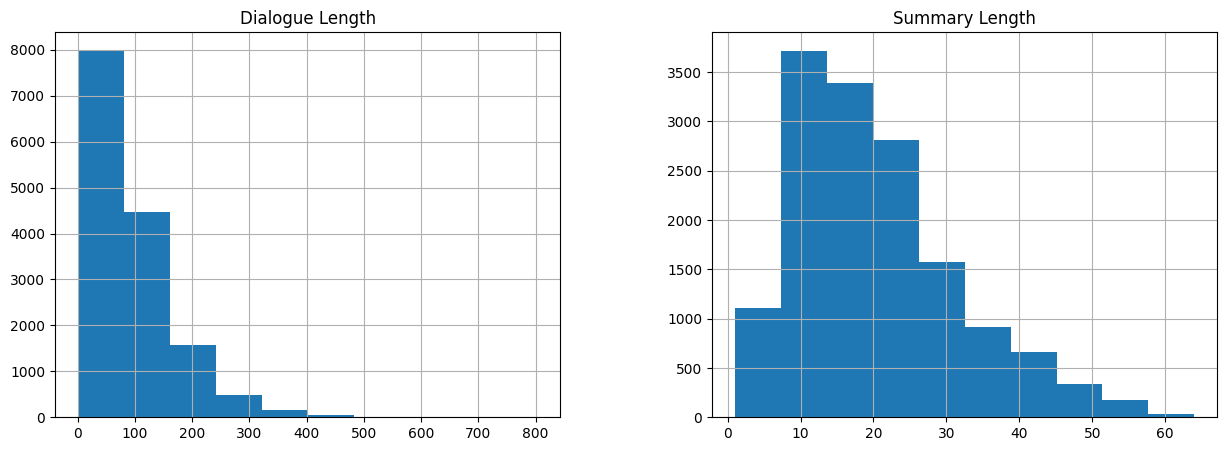

In [19]:
import pandas as pd
data = pd.DataFrame([dialogue_len, summary_len]).T
data.columns = ['Dialogue Length', 'Summary Length']

data

data.hist(figsize = (15,5))

Here we see that the maximum length of a __Dialogue__ is not more than __500__ and the maximum length of the generated summary is also less than __70__ words.

In [20]:
# lets build the DATA COLLATOR
def get_feature(batch):
    encodings = tokenizer(batch['dialogue'], text_target = batch['summary'], max_length = 1024, truncation = True)
    encodings = {'input_ids': encodings['input_ids'], 'attention_mask': encodings['attention_mask'], 'labels': encodings['labels']}
    return encodings

In [21]:
samsun_pt = samsun.map(get_feature, batched = True)

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [22]:
samsun_pt

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 818
    })
})

In [23]:
columns = ['input_ids', 'labels', 'attention_mask']
samsun_pt.set_format(type = 'torch', columns = columns)

In [ ]:
from transformers import DataCollatorForSeq2Seq, Trainer, TrainingArguments
data_collator = DataCollatorForSeq2Seq(tokenizer, model = model)
training_args = TrainingArguments(
    output_dir = 'bart_samsum',
    run_name="text-summarization-transformers",  # Unique name for the wandb run
    report_to="wandb", 
    num_train_epochs = 1,
    per_device_train_batch_size = 4,
    per_device_eval_batch_size = 4,
    weight_decay = 0.01,
    logging_steps = 10,
    eval_strategy = 'steps',
    eval_steps = 500,
    save_steps = 1e6,
    gradient_accumulation_steps = 16
)
trainer = Trainer(model = model, args = training_args, processing_class = tokenizer, data_collator = data_collator, train_dataset = samsun_pt['train'], eval_dataset = samsun_pt['validation'])

In [ ]:
trainer.train() 

## Saving the model
Now since we trained the model on the provided data, so in order to use the same model to perform the same task of Text Summarisation we need not to run the whole code again, we just have to save the model. Giving a custom name to the saved model.

In [ ]:
trainer.save_model("Text_summarization_2ndProject")

## Testing the model on the new data
Now since we have made a machine learning model that summarizes text, so in order to see its flexibility we will run it on the new data and test its validity that if it is working with the same precision as for the previous data or not.

In [ ]:
#custom Dialogue Prediction

pipe = pipeline('summarization', model = 'Text_summarization_2ndProject')
gen_kwargs = {'length_penalty': 0.8, 'num_beams': 8, 'max_length': 128}

custom_dialogue = """“Look what Eddie gave me,” said Cindy, all friendly. She pulled a pink teddy bear out of her purse and squeezed its belly. It sang “You Are My Sunshine” in a vibrating robot voice. “That’s nice,” said Jasmine, her voice so high that she sounded almost like the teddy bear. Cindy smiled and walked off with Eddie, swinging her hips back and forth.
"""

print(pipe(custom_dialogue, **gen_kwargs))

Finally, we can see the generated summary of the custom dialogue created, hence we can conclude that our Text Summarization model is working fine with new data as well.